# Deep Learning with Tensorflow
## Neural Network
A basic neural network consists of an input layer, which is just your data, in numerical form. After your input layer, you will have some number of what are called "hidden" layers. A hidden layer is just in between your input and output layers. One hidden layer means you just have a neural network. Two or more hidden layers means you've got a deep neural network!

![Image of Neural Network](https://cdn-images-1.medium.com/max/791/0*0mia7BQKjUAuXeqZ.jpeg)

## Step 1: Import the libraries
We are going to use Keras to train the neural network. Keras has become so popular, that it is now a superset, included with TensorFlow releases.
We are also going to import matplotlib. Matplotlib is a 2D plotting library andis very useful for visualizing data

In [1]:
import tensorflow as tf
tf.__version__

'1.10.0'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2: Prepare the data
We willbe using the popular MNIST data in this example. MNIST dataset consist of over 70000 handwritten digits from 0-9. Each image is of the size 28x28 pixels. We can get the MNIST data from the keraspackage itself.

In [3]:
# Load the mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

Now lets check the what is present in the data
By running the code below we can see that the training data consist of 60000 images and testing data consist of 10000 images.
x_train consist of 'features' which is pixel values in our case. y_train consist of 'labels'.

In [4]:
print('X Train shape :',x_train.shape)
print('Y Train shape :',y_train.shape)
print('X Test shape :',x_test.shape)
print('Y Test shape :',y_test.shape)

X Train shape : (60000, 28, 28)
Y Train shape : (60000,)
X Test shape : (10000, 28, 28)
Y Test shape : (10000,)


Lets now check what is in the first training set 

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

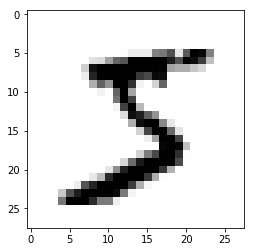

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

Here the first data in the training set is 5. Its pixel is also shown above. We can see that the pixel values are between 0-255. So our next step is to normalize this data between 0 and 1

In [7]:
# Normalize the datas
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Now the data is normalized and all values are between 0 and 1

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

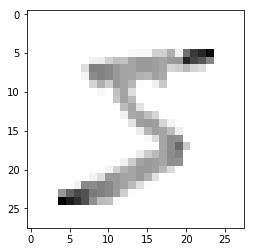

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

## Step 3: Build the Model
A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model.

In [10]:
model = tf.keras.models.Sequential()

Now we need to add layers to this model. We will be having 1 input layer, 2 hidden layer and an output layer
We first need to convert our input from 2D to 1 dimension to feed it to neural network. So the first layer will consist of 784 neurons(28x28). There are many ways to do this, but keras has Flatten layer and we can just use it for this.

In [11]:
model.add(tf.keras.layers.Flatten())

Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node.
These layers will have 128 neurons and we will use activation function relu(rectified linear). The activation function of a node defines the output of that node given an input or set of inputs.

In [12]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

Now we need to add the output layer. It will have a neuron for each digit which will make a total of 10 neurons. The activation function used here is softmax because we need a probability distribution so we can predict the output based on ehich neuron has the highest probability

In [13]:
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.
The optimizer used is adam because its just a great default to start with.
Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.
And in metrics we need only accuracy

In [14]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

Now we fit the data.  Epoch is just a "full pass" through your entire training dataset. So if you just train on 1 epoch, then the neural network saw each unique sample once. 3 epochs means it passed over your data set 3 times.

In [15]:
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 7s 117us/step - loss: 0.2607 - acc: 0.9232
Epoch 2/3
60000/60000 [==============================] - 7s 116us/step - loss: 0.1072 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 6s 107us/step - loss: 0.0726 - acc: 0.9774


We have a high accuracy and thats great.

Now that's loss and accuracy for in-sample data. Getting a high accuracy and low loss might mean your model learned how to classify digits in general (it generalized)...or it simply memorized every single example you showed it (it overfit). This is why we need to test on out-of-sample data (data we didn't use to train the model).

In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_acc)

10000/10000 [==============================] - 0s 38us/step
0.9694


On the test data also we have got a good result

In [17]:
y_predict = model.predict(x_test)

Here are some of the misclassified images with the predicted label

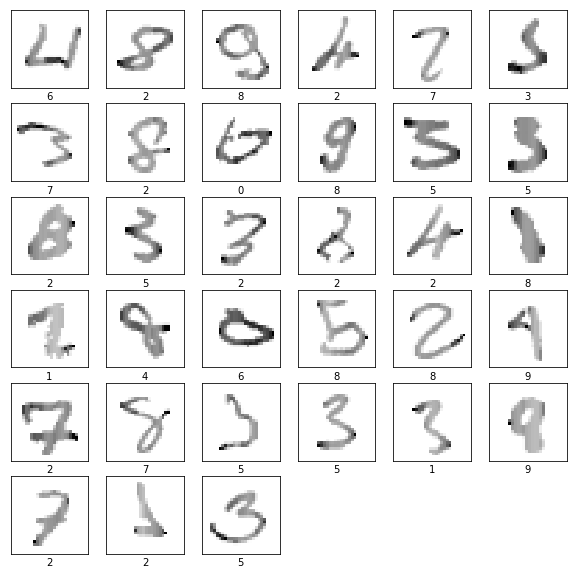

In [18]:
import numpy as np

plt.figure(figsize=(10,10))
count=1;
for i in range(1,1000):
    if (y_test[i]!=np.argmax(y_predict[i])):
        #plt.imshow(x_test[i])
        #plt.title(np.argmax(y_predict[i]))
        plt.subplot(6,6,count)
        count+=1
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i], cmap=plt.cm.binary)
        plt.xlabel(np.argmax(y_predict[i]))